# Лабораторная работа 3, задача 1, вариант 17

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Вариант 17:
$$
y=e^x+x\\
a)X_i = -2,-1,0,1\\
б)X_i = -2,-1,0,2,2\\
X^* = -0.5
$$

In [ ]:
def function(x):
    return np.exp(x) + x

In [ ]:
# вычисление произведения элементов в методе Лагранжа
def multiplyLagrange(x0, x, n, index):
    
    multiply = 1
    
    for i in range(0, n):
        if index != i:
            multiply = multiply * (x0 - x[i])/(x[index] - x[i])
    
    return multiply

In [ ]:
# вычисление произведения элементов в методе Ньютона
def multiplyNewton(x0, x, n):
    multiply = 1

    for i in range(0, n):
            multiply = multiply * (x0 - x[i])

    return multiply

In [ ]:
def polynomOfLagrange(x0, x, n):
    summary = 0
    for i in range(0, n):
        summary = summary + function(x[i]) * multiplyLagrange(x0, x, n, i)
    
    return summary

In [ ]:
def divideddifference(x, n):
    if n > 2:
        x1 = np.zeros(n-1)
        x2 = np.zeros(n-1)
        for i in range(0, n):
            if i != n - 1:
                x1[i] = x[i]
            if i != 0:
                x2[i - 1] = x[i]
        return (divideddifference(x1, n - 1) - divideddifference(x2, n - 1)) / (x[0] - x[n - 1])

    if n == 2:
        return (function(x[0]) - function(x[1])) / (x[0] - x[1])
    if n == 1:
        return function(x[0])

In [ ]:
def polynomOfNewton(x0, x, n):

    summary = 0
    for i in range(0, n):
        dd = divideddifference(x, i+1)
        summary = summary + dd * multiplyNewton(x0, x, i)
    
    return summary

In [ ]:
x0 = -0.5
x = [[-2, -1, 0, 1],[-2, -1, 0, 1, 2]]

In [ ]:
print("Получим ошибки в точке X* для метода Лагранжа:")
for x_ in x:
  lagr = polynomOfLagrange(x0, x_, len(x_))

  print("L" + str(len(x_) - 1) + "(" + str(x0) + ") = " + str(lagr))

  print("y(" + str(x0) + ") = " + str(function(x0)))
  print("Ошибка = " + str(abs(function(x0) - lagr)))

Получим ошибки в точке X* для метода Лагранжа:
L3(-0.5) = 0.09108111617795775
y(-0.5) = 0.10653065971263342
Ошибка = 0.015449543534675675
L4(-0.5) = 0.11873142016964466
y(-0.5) = 0.10653065971263342
Ошибка = 0.01220076045701124


In [ ]:
test = np.linspace(-2, 2, 10)
y_lagr = np.zeros(len(test))
for i in range(0, len(test)):
    y_lagr[i] = polynomOfLagrange(test[i], xa, n)

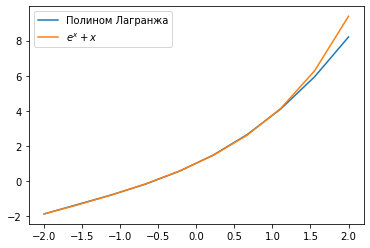

In [ ]:
fig, ax = plt.subplots()
ax.plot(test, y_lagr)
ax.plot(test, function(test))
ax.legend(["Полином Лагранжа","$e^x+x$"])
plt.xlim()
plt.show()

In [ ]:
print("Получим ошибки в точке X* для метода Ньютона:")
for x_ in x:
  newton = polynomOfNewton(x0, x_, len(x_))

  y_newt = np.zeros(len(test))
  for i in range(0, len(test)):
      y_newt[i] = polynomofnewton(test[i], x_, len(x_))

  print("P" + str(len(x_) - 1) + "(" + str(x0) + ") = " + str(newton))
  print("y(" + str(x0) + ") = " + str(function(x0)))

  print("Interpolation error = " + str(abs(function(x0) - newton)))

Получим ошибки в точке X* для метода Ньютона:
P3(-0.5) = 0.0910811161779577
y(-0.5) = 0.10653065971263342
Interpolation error = 0.01544954353467573
P4(-0.5) = 0.11873142016964475
y(-0.5) = 0.10653065971263342
Interpolation error = 0.012200760457011323


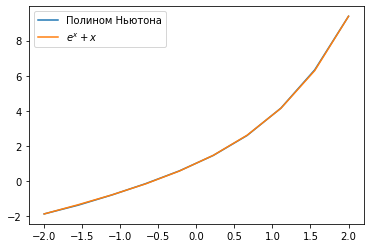

In [ ]:
fig, ax = plt.subplots()
ax.plot(test, y_newt)
ax.plot(test, function(test))
ax.legend(["Полином Ньютона", "$e^x+x$"])
plt.show()